In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
from scipy.stats import ttest_ind
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data = "D:/school/Masters Data Science/Spring 2020/DSC680_Applied Data Science/CarsProject/craigslistVehicles.csv/craigslistVehicles.csv"
usedCars = pd.read_csv(data)

In [3]:
usedCars.head(10)

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,lat,long
0,https://tricities.craigslist.org/cto/d/1978-br...,tricities,5000,1978.0,ford,bronco,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00r0r_eGnnFC1JNm...,37.132840,-95.785580
1,https://tricities.craigslist.org/cto/d/2008-bu...,tricities,5000,2008.0,buick,lucerne cxl v6,like new,6 cylinders,gas,51000.0,clean,automatic,NaN,fwd,full-size,sedan,grey,https://images.craigslist.org/00N0N_1LSHqLESW9...,35.777999,-83.612533
2,https://tricities.craigslist.org/cto/d/2006-po...,tricities,13500,2006.0,NaN,Pont GTO,excellent,8 cylinders,gas,93000.0,clean,automatic,NaN,rwd,mid-size,coupe,red,https://images.craigslist.org/00Y0Y_4cbEgS4prY...,36.333900,-82.340800
3,https://tricities.craigslist.org/cto/d/2006-me...,tricities,6200,2006.0,mercedes-benz,NaN,NaN,NaN,gas,NaN,rebuilt,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00T0T_fGLx4Ltazq...,36.000092,-84.018302
4,https://tricities.craigslist.org/cto/d/2016-fo...,tricities,37900,2016.0,ford,f350,excellent,8 cylinders,diesel,70500.0,clean,automatic,NaN,4wd,NaN,truck,white,https://images.craigslist.org/00k0k_ls78o6lwVq...,36.272932,-82.537537
5,https://tricities.craigslist.org/cto/d/jeep-wr...,tricities,7900,2000.0,NaN,Wrangler TJ,good,4 cylinders,gas,NaN,clean,manual,NaN,4wd,NaN,SUV,red,https://images.craigslist.org/00u0u_jHAD7SbuFt...,36.399600,-82.452300
6,https://tricities.craigslist.org/cto/d/1992-me...,tricities,1200,1992.0,mercedes-benz,benz,NaN,NaN,gas,194000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_dzlLW9ZPKY...,36.416200,-83.010800
7,https://tricities.craigslist.org/cto/d/2003-ch...,tricities,5000,2003.0,chevrolet,silverado,like new,8 cylinders,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00L0L_4l6UhUL3qX...,36.344500,-82.201500
8,https://tricities.craigslist.org/ctd/d/2010-ni...,tricities,9950,2010.0,nissan,armada,excellent,8 cylinders,gas,155244.0,clean,automatic,5N1AA0NC7AN602236,4wd,full-size,SUV,black,https://images.craigslist.org/00n0n_gOocwNdHG0...,37.286501,-80.056719
9,https://tricities.craigslist.org/ctd/d/2003-fo...,tricities,5950,2003.0,ford,expedition,excellent,8 cylinders,gas,141602.0,clean,automatic,1FMFU18L73LC08586,4wd,full-size,SUV,green,https://images.craigslist.org/00V0V_darIoRE1z1...,37.286501,-80.056719


In [4]:
usedCars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677812 entries, 0 to 677811
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           677812 non-null  object 
 1   city          677812 non-null  object 
 2   price         677812 non-null  int64  
 3   year          677514 non-null  float64
 4   manufacturer  624214 non-null  object 
 5   make          650319 non-null  object 
 6   condition     397822 non-null  object 
 7   cylinders     401581 non-null  object 
 8   fuel          670034 non-null  object 
 9   odometer      453250 non-null  float64
 10  title_status  673279 non-null  object 
 11  transmission  670682 non-null  object 
 12  VIN           240365 non-null  object 
 13  drive         415113 non-null  object 
 14  size          231502 non-null  object 
 15  type          398859 non-null  object 
 16  paint_color   402534 non-null  object 
 17  image_url     677754 non-null  object 
 18  lat 

In [5]:
usedCars.describe()

,price,year,odometer,lat,long
count,6.778120e+05,677514.000000,4.532500e+05,670965.000000,670965.000000
mean,6.145579e+05,2005.014767,1.125260e+05,38.922054,-93.913802
std,4.469918e+07,12.037830,1.340298e+05,6.167192,17.237383
min,1.000000e+00,1900.000000,0.000000e+00,-84.810047,-179.824219
25%,3.500000e+03,2002.000000,5.600000e+04,34.956944,-106.221100
50%,7.500000e+03,2007.000000,1.052265e+05,39.499100,-88.328200
75%,1.550000e+04,2013.000000,1.510000e+05,42.659300,-81.037100
max,4.294967e+09,2019.000000,1.000000e+07,90.000000,127.790222


In [6]:
usedCars.shape

(677812, 20)

In [7]:
# Changing the pricing format
# usedCars['price'] = (usedCars['price']/1).apply(lambda x: '{:,.2f}'.format(x))

In [8]:
noURLCars=usedCars.drop(columns=['url', 'image_url', 'VIN'])
noURLCars

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
0,tricities,5000,1978.0,ford,bronco,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,37.132840,-95.785580
1,tricities,5000,2008.0,buick,lucerne cxl v6,like new,6 cylinders,gas,51000.0,clean,automatic,fwd,full-size,sedan,grey,35.777999,-83.612533
2,tricities,13500,2006.0,NaN,Pont GTO,excellent,8 cylinders,gas,93000.0,clean,automatic,rwd,mid-size,coupe,red,36.333900,-82.340800
3,tricities,6200,2006.0,mercedes-benz,NaN,NaN,NaN,gas,NaN,rebuilt,automatic,NaN,NaN,NaN,NaN,36.000092,-84.018302
4,tricities,37900,2016.0,ford,f350,excellent,8 cylinders,diesel,70500.0,clean,automatic,4wd,NaN,truck,white,36.272932,-82.537537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677807,anchorage,14050,2007.0,dodge,caravan (braun ramp),excellent,NaN,gas,NaN,clean,automatic,fwd,mid-size,mini-van,green,61.288605,-148.894406
677808,anchorage,3299,2005.0,gmc,g1500,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,61.592300,-149.395900
677809,anchorage,9500,2016.0,kia,rio lx,like new,4 cylinders,gas,3180.0,clean,automatic,fwd,mid-size,sedan,blue,61.190000,-149.893800
677810,anchorage,8499,2014.0,ford,mustang,fair,6 cylinders,gas,NaN,clean,manual,rwd,full-size,coupe,black,61.630300,-148.987200


In [9]:
noURLCars['cylinders'] = noURLCars['cylinders'].str.replace('cylinders', '')

In [10]:
noURLCars.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
0,tricities,5000,1978.0,ford,bronco,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,37.132840,-95.785580
1,tricities,5000,2008.0,buick,lucerne cxl v6,like new,6,gas,51000.0,clean,automatic,fwd,full-size,sedan,grey,35.777999,-83.612533
2,tricities,13500,2006.0,NaN,Pont GTO,excellent,8,gas,93000.0,clean,automatic,rwd,mid-size,coupe,red,36.333900,-82.340800
3,tricities,6200,2006.0,mercedes-benz,NaN,NaN,NaN,gas,NaN,rebuilt,automatic,NaN,NaN,NaN,NaN,36.000092,-84.018302
4,tricities,37900,2016.0,ford,f350,excellent,8,diesel,70500.0,clean,automatic,4wd,NaN,truck,white,36.272932,-82.537537


In [11]:
corrMatrix = noURLCars.corr()
print (corrMatrix)

             price      year  odometer       lat      long
price     1.000000 -0.000212  0.000158 -0.013054  0.004682
year     -0.000212  1.000000 -0.189555  0.035915 -0.042258
odometer  0.000158 -0.189555  1.000000 -0.019527  0.043870
lat      -0.013054  0.035915 -0.019527  1.000000 -0.302246
long      0.004682 -0.042258  0.043870 -0.302246  1.000000


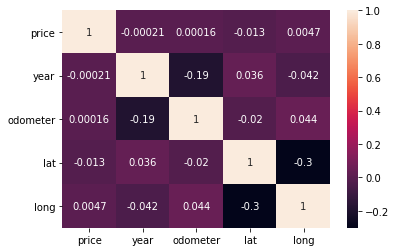

In [12]:
sn.heatmap(corrMatrix, annot=True)

In [13]:
# Testing - Is the average price of Automatic, manual, and other cars the same
# Use groupby to check the mean difference
# null hypothesis - There is no significant difference in the average price of automatic, manual, and other cars
# Alternate hypothesis - Ther is a significant differnce in the average price of automatic, manual, and other cars

In [14]:
usedCars.price.groupby(usedCars.transmission).mean()

transmission
automatic    605404.322334
manual       342939.928131
other        790313.210728
Name: price, dtype: float64

In [15]:
auto = usedCars[usedCars.transmission == 'automatic']
manual = usedCars[usedCars.transmission == 'manual']

In [16]:
# p-value is lower than 0.05, rejecting the null hypothesis
ttest_ind(auto.price, manual.price, equal_var=False)

Ttest_indResult(statistic=2.2922418824797797, pvalue=0.021893091611603667)

In [17]:
noURLCars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677812 entries, 0 to 677811
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   city          677812 non-null  object 
 1   price         677812 non-null  int64  
 2   year          677514 non-null  float64
 3   manufacturer  624214 non-null  object 
 4   make          650319 non-null  object 
 5   condition     397822 non-null  object 
 6   cylinders     401581 non-null  object 
 7   fuel          670034 non-null  object 
 8   odometer      453250 non-null  float64
 9   title_status  673279 non-null  object 
 10  transmission  670682 non-null  object 
 11  drive         415113 non-null  object 
 12  size          231502 non-null  object 
 13  type          398859 non-null  object 
 14  paint_color   402534 non-null  object 
 15  lat           670965 non-null  float64
 16  long          670965 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usage

In [18]:
# changing the data type
# noURLCars['price'] = pd.to_numeric(noURLCars['price'],errors='coerce')

In [19]:
noURLCars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677812 entries, 0 to 677811
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   city          677812 non-null  object 
 1   price         677812 non-null  int64  
 2   year          677514 non-null  float64
 3   manufacturer  624214 non-null  object 
 4   make          650319 non-null  object 
 5   condition     397822 non-null  object 
 6   cylinders     401581 non-null  object 
 7   fuel          670034 non-null  object 
 8   odometer      453250 non-null  float64
 9   title_status  673279 non-null  object 
 10  transmission  670682 non-null  object 
 11  drive         415113 non-null  object 
 12  size          231502 non-null  object 
 13  type          398859 non-null  object 
 14  paint_color   402534 non-null  object 
 15  lat           670965 non-null  float64
 16  long          670965 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usage

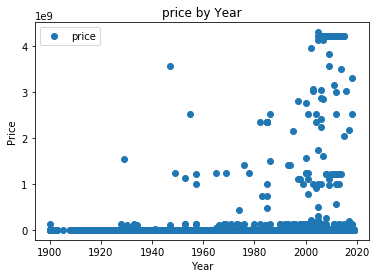

In [20]:
# scatterplot
noURLCars.plot(x='year', y='price', style='o')  
plt.title('price by Year')  
plt.xlabel('Year')  
plt.ylabel('Price')  
plt.rcParams['figure.figsize'] = (10, 6)
plt.show()

In [21]:
noURLCars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677812 entries, 0 to 677811
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   city          677812 non-null  object 
 1   price         677812 non-null  int64  
 2   year          677514 non-null  float64
 3   manufacturer  624214 non-null  object 
 4   make          650319 non-null  object 
 5   condition     397822 non-null  object 
 6   cylinders     401581 non-null  object 
 7   fuel          670034 non-null  object 
 8   odometer      453250 non-null  float64
 9   title_status  673279 non-null  object 
 10  transmission  670682 non-null  object 
 11  drive         415113 non-null  object 
 12  size          231502 non-null  object 
 13  type          398859 non-null  object 
 14  paint_color   402534 non-null  object 
 15  lat           670965 non-null  float64
 16  long          670965 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usage

In [22]:
noURLCars['price'] = noURLCars['price'].fillna(0)

In [23]:
noURLCars['year'] = noURLCars['year'].fillna(0)

In [24]:
# Dataframe containing only sedans.
sedanType = noURLCars[noURLCars['type']=='sedan'].sample(500)

In [25]:
sedanType.head(10)

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
307007,flint,3995,2005.0,pontiac,grand prix,excellent,6,gas,140000.0,clean,automatic,fwd,mid-size,sedan,silver,42.967226,-83.692625
386164,staugustine,9999,2012.0,hyundai,sonata,NaN,NaN,other,69984.0,clean,automatic,NaN,full-size,sedan,silver,29.914652,-81.324287
333282,cincinnati,6900,2008.0,chrysler,pacifica,excellent,6,gas,NaN,clean,automatic,4wd,full-size,sedan,blue,39.441300,-84.365200
457136,reno,10700,2008.0,bmw,128i,excellent,6,gas,63000.0,clean,automatic,rwd,NaN,sedan,white,39.792880,-119.919547
467697,fredericksburg,9995,2012.0,kia,optima,NaN,4,gas,100500.0,clean,automatic,fwd,NaN,sedan,white,38.507240,-77.374070
155775,morgantown,2800,2007.0,ford,fusion sel,good,4,gas,196000.0,clean,manual,fwd,mid-size,sedan,red,39.341400,-80.028500
516525,wenatchee,23999,2015.0,subaru,wrx awd gas sedan stick,NaN,NaN,gas,34812.0,clean,manual,4wd,NaN,sedan,grey,47.886507,-122.260131
44161,mobile,10800,2011.0,chevrolet,impala ltz,like new,6,gas,58400.0,clean,automatic,fwd,full-size,sedan,silver,30.807559,-86.971729
502103,visalia,12577,2017.0,chevrolet,sonic,NaN,NaN,other,44423.0,clean,automatic,NaN,compact,sedan,silver,36.331430,-119.282858
618669,providence,2200,2004.0,volkswagen,NaN,good,4,gas,114000.0,clean,automatic,fwd,compact,sedan,silver,41.730872,-71.273889


In [26]:
# changing NaN values 
sedanType['manufacturer'].fillna(sedanType['manufacturer'].mode().values[0], inplace = True)
sedanType.head(10)

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
307007,flint,3995,2005.0,pontiac,grand prix,excellent,6,gas,140000.0,clean,automatic,fwd,mid-size,sedan,silver,42.967226,-83.692625
386164,staugustine,9999,2012.0,hyundai,sonata,NaN,NaN,other,69984.0,clean,automatic,NaN,full-size,sedan,silver,29.914652,-81.324287
333282,cincinnati,6900,2008.0,chrysler,pacifica,excellent,6,gas,NaN,clean,automatic,4wd,full-size,sedan,blue,39.441300,-84.365200
457136,reno,10700,2008.0,bmw,128i,excellent,6,gas,63000.0,clean,automatic,rwd,NaN,sedan,white,39.792880,-119.919547
467697,fredericksburg,9995,2012.0,kia,optima,NaN,4,gas,100500.0,clean,automatic,fwd,NaN,sedan,white,38.507240,-77.374070
155775,morgantown,2800,2007.0,ford,fusion sel,good,4,gas,196000.0,clean,manual,fwd,mid-size,sedan,red,39.341400,-80.028500
516525,wenatchee,23999,2015.0,subaru,wrx awd gas sedan stick,NaN,NaN,gas,34812.0,clean,manual,4wd,NaN,sedan,grey,47.886507,-122.260131
44161,mobile,10800,2011.0,chevrolet,impala ltz,like new,6,gas,58400.0,clean,automatic,fwd,full-size,sedan,silver,30.807559,-86.971729
502103,visalia,12577,2017.0,chevrolet,sonic,NaN,NaN,other,44423.0,clean,automatic,NaN,compact,sedan,silver,36.331430,-119.282858
618669,providence,2200,2004.0,volkswagen,NaN,good,4,gas,114000.0,clean,automatic,fwd,compact,sedan,silver,41.730872,-71.273889


In [27]:
# Dataframe containing only coupe.
coupeType = noURLCars[noURLCars['type']=='coupe'].sample(500)
coupeType.head(10)

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
635543,memphis,19980,2015.0,ford,mustang,NaN,4,gas,36995.0,clean,manual,rwd,NaN,coupe,black,35.186081,-89.794496
592256,whistler,5888,2001.0,mercedes-benz,slk230,excellent,NaN,gas,150893.0,clean,automatic,rwd,sub-compact,coupe,NaN,49.195031,-122.931583
277919,dayton,5900,2008.0,honda,civic ex,excellent,4,gas,113000.0,clean,automatic,fwd,compact,coupe,blue,39.942000,-84.166300
517425,wenatchee,15995,2014.0,bmw,428i,NaN,4,gas,78542.0,clean,automatic,rwd,NaN,coupe,white,47.974717,-122.211863
564130,philadelphia,16250,1970.0,mercury,courgar,excellent,8,gas,110000.0,clean,automatic,rwd,compact,coupe,yellow,40.064200,-74.689900
214924,northmiss,3500,1970.0,volkswagen,beetle,good,4,gas,NaN,clean,manual,rwd,compact,coupe,green,33.481200,-88.355400
645452,chicago,1000,1995.0,chevrolet,camaro,fair,8,gas,130000.0,clean,manual,rwd,NaN,coupe,NaN,42.123000,-88.260600
377528,jacksonville,19995,2014.0,dodge,challenger sxt,excellent,6,gas,37006.0,clean,automatic,rwd,mid-size,coupe,red,30.290800,-81.632100
169125,nwga,1,2001.0,honda,civic,NaN,4,gas,0.0,clean,manual,fwd,NaN,coupe,black,33.790988,-84.693354
526587,harrisburg,1500,2004.0,pontiac,grand am,good,6,gas,179000.0,clean,automatic,NaN,NaN,coupe,white,40.329900,-77.180900


(0, 20000)

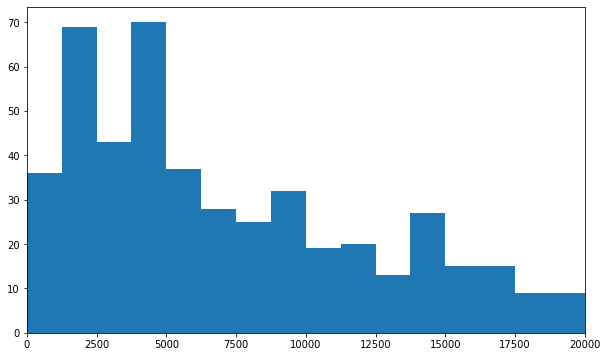

In [84]:
plt.hist(sedanType.price, bins=40)
plt.xlim(0, 20000)

Text(0.5, 0, 'Price')

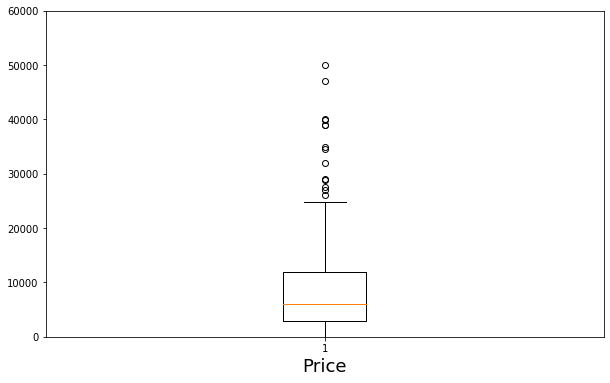

In [29]:
# boxplot for the sedan price. It is good to note that we have an extreme outlier over 80,000
plt.boxplot(sedanType.price)
plt.ylim(0, 60000)
plt.xlabel('Price', size=18)


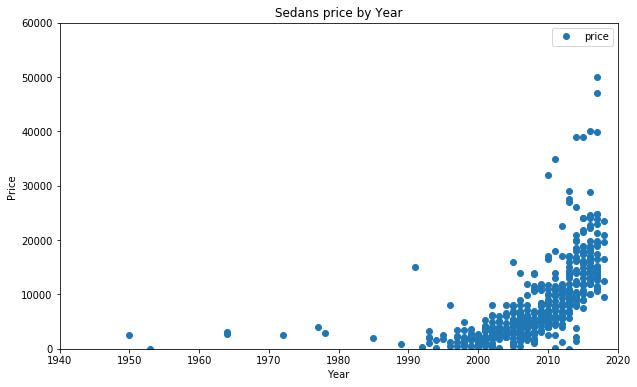

In [30]:
# Residual plot 500 males.
#fig = plt.figure(figsize=(10,7))
#sns.residplot(sedanType.year, sedanType.price, color='blue')

sedanType.plot(x='year', y='price', style='o')  
plt.xlim(1940, 2020)
plt.ylim(0, 60000)
plt.title('Sedans price by Year')  
plt.xlabel('Year')  
plt.ylabel('Price')
plt.show()

In [31]:
linR = LinearRegression()
# Fit linear regression to sedan price and year.
linR.fit(sedanType[['price']], sedanType['year'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# Get the slope and intercept of the line best fit.
print(linR.intercept_)

2002.987742319893


In [33]:
print(linR.coef_)

[0.00054036]


Quest to find the optimal K value

In [34]:
sedan_Cont = sedanType[['year', 'price']]
sedan_Cont.head(5)

,year,price
307007,2005.0,3995
386164,2012.0,9999
333282,2008.0,6900
457136,2008.0,10700
467697,2012.0,9995


In [35]:
mms = MinMaxScaler()
mms.fit(sedan_Cont)
sedan_transformed = mms.transform(sedan_Cont)

In [36]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(sedan_transformed)
    Sum_of_squared_distances.append(km.inertia_)

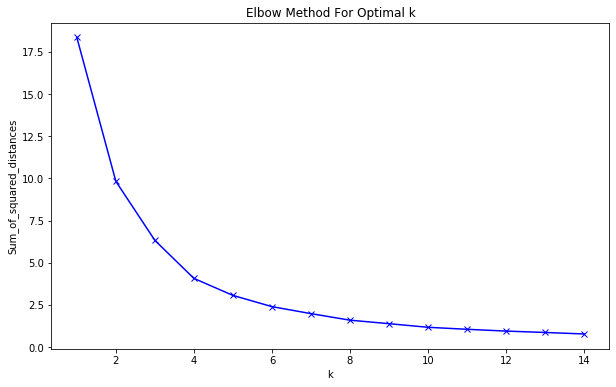

In [37]:
# Here we see that the elbow is at 5 so that will be our K value
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
# Setting my clusters count
km = KMeans(n_clusters = 4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

The first K Means clustering is done with scaling the continuous features to give equal importance to all features

In [39]:
sedan_transformed = pd.DataFrame(sedan_transformed, columns = ['year', 'price'])
sedan_transformed.head(10)

,year,price
0,0.839506,0.079890
1,0.925926,0.199984
2,0.876543,0.137997
3,0.876543,0.214006
4,0.925926,0.199904
5,0.864198,0.055987
6,0.962963,0.480018
7,0.913580,0.216006
8,0.987654,0.251550
9,0.827160,0.043985


In [40]:
k_pred = km.fit_predict(sedan_transformed[['year', 'price']])
k_pred

array([0, 1, 0, 1, 1, 0, 3, 1, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 3, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 3, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 0, 1, 0, 0, 1, 0, 3,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 3, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 3, 1, 0,
       1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       3, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 3, 1, 1, 0, 0, 3, 1, 1, 1, 3, 0, 0, 1, 0, 1,
       0, 3, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [41]:
sedan_transformed['cluster'] = k_pred
sedan_transformed.head(5)

,year,price,cluster
0,0.839506,0.079890,0
1,0.925926,0.199984,1
2,0.876543,0.137997,0
3,0.876543,0.214006,1
4,0.925926,0.199904,1


Text(0, 0.5, 'Price')

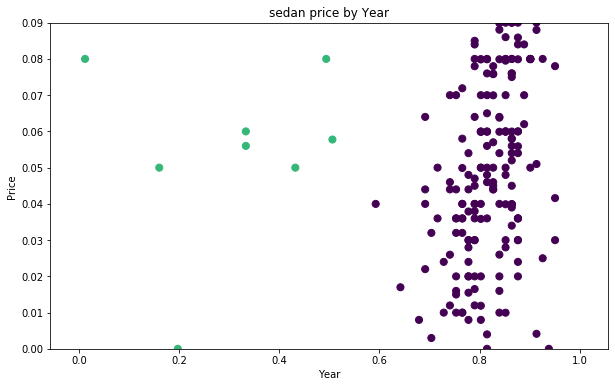

In [42]:
plt.scatter(sedan_transformed.year, sedan_transformed.price, c=k_pred, s=50, cmap='viridis')
# plt.xticks(rotation=90)
plt.ylim(0, .09)
plt.title('sedan price by Year')  
plt.xlabel('Year')  
plt.ylabel('Price')

This K Means clustering is done without scaling the continuous features

In [43]:
# Setting my clusters count
km = KMeans(n_clusters = 4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
y_pred = km.fit_predict(sedanType[['year', 'price']])
y_pred

array([0, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 3, 0, 0,
       2, 0, 2, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 3, 0, 2, 0, 0, 2, 0, 0, 2, 0, 3,
       2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1,
       2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 3, 1, 1, 2, 2, 1, 2, 1,
       0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 2, 3, 0, 0, 2, 0, 2,
       0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2,

In [45]:
sedanType['cluster'] = y_pred
sedanType.head(5)

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,cluster
307007,flint,3995,2005.0,pontiac,grand prix,excellent,6,gas,140000.0,clean,automatic,fwd,mid-size,sedan,silver,42.967226,-83.692625,0
386164,staugustine,9999,2012.0,hyundai,sonata,NaN,NaN,other,69984.0,clean,automatic,NaN,full-size,sedan,silver,29.914652,-81.324287,2
333282,cincinnati,6900,2008.0,chrysler,pacifica,excellent,6,gas,NaN,clean,automatic,4wd,full-size,sedan,blue,39.441300,-84.365200,0
457136,reno,10700,2008.0,bmw,128i,excellent,6,gas,63000.0,clean,automatic,rwd,NaN,sedan,white,39.792880,-119.919547,2
467697,fredericksburg,9995,2012.0,kia,optima,NaN,4,gas,100500.0,clean,automatic,fwd,NaN,sedan,white,38.507240,-77.374070,2


(0, 80000)

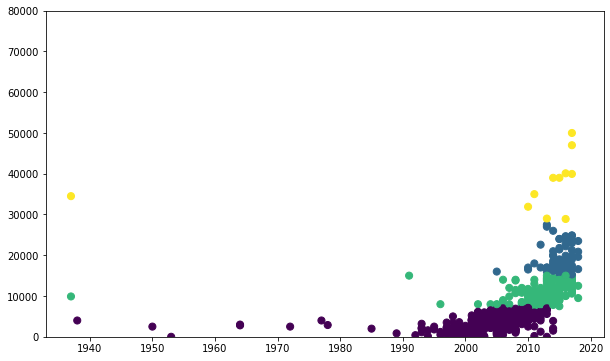

In [46]:
# plotting the K Means 
plt.scatter(sedanType.year, sedanType.price, c=y_pred, s=50, cmap='viridis')
plt.ylim(0, 80000)

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

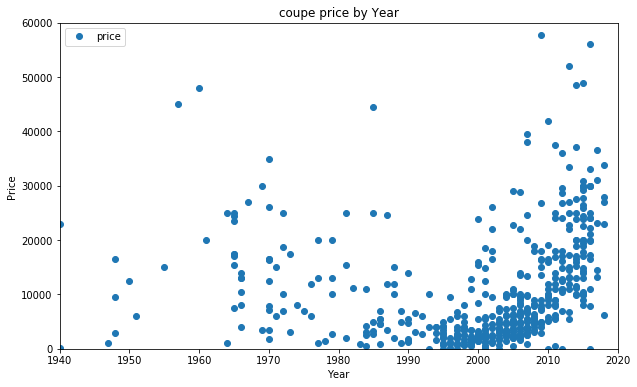

In [47]:
coupeType.plot(x='year', y='price', style='o')  
plt.xlim(1940, 2020)
plt.ylim(0, 60000)
plt.title('coupe price by Year')  
plt.xlabel('Year')  
plt.ylabel('Price')
plt.show()

In [48]:
# Fit linear regression to coupe price and year.
linR.fit(coupeType[['price']], coupeType['year'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# Get the slope and intercept of the line best fit.
print(linR.intercept_)

1998.428833741819


In [50]:
print(linR.coef_)

[9.71409993e-05]


Text(0, 0.5, 'price')

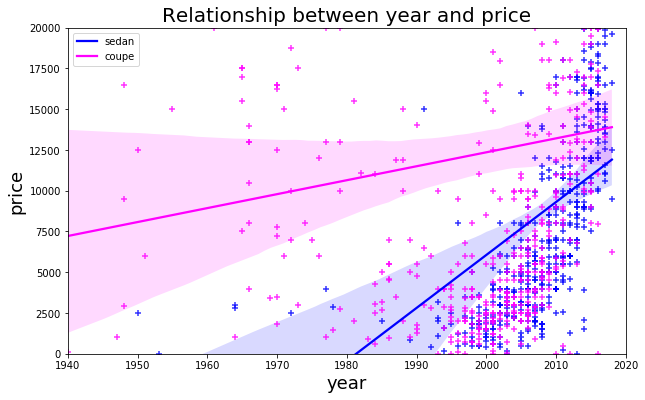

In [51]:
# Regression plot using seaborn.
#fig = plt.figure(figsize=(10,7))
sns.regplot(x=sedanType.year,y=sedanType.price,color='blue', marker='+')
sns.regplot(x=coupeType.year,y=coupeType.price,color='magenta', marker='+')
plt.xlim(1940, 2020)
plt.ylim(0, 20000)

# Legend, title and labels.
plt.legend(labels=['sedan','coupe'])
plt.title('Relationship between year and price', size=20)
plt.xlabel('year', size=18)
plt.ylabel('price', size=18)

In [52]:
x_reg = sedan_transformed['year'].values.reshape(-1,1)
y_reg = sedan_transformed['price'].values.reshape(-1,1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x_reg, y_reg, test_size=0.3, random_state=0)

In [54]:
#training the algorithm
linR = LinearRegression()  
linR.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
#To retrieve the intercept:
print(linR.intercept_)

[-0.42136408]


In [56]:
#For retrieving the slope:
print(linR.coef_)

[[0.6831518]]


In [57]:
y_linR = linR.predict(X_test)

In [58]:
predLinR = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_linR.flatten()})
predLinR

,Actual,Predicted
0,0.039965,0.118410
1,0.444013,0.244920
2,0.417610,0.261788
3,0.109993,0.169014
4,0.451934,0.211184
...,...,...
145,0.199904,0.211184
146,0.578049,0.244920
147,0.047986,0.135278
148,0.079990,0.194316


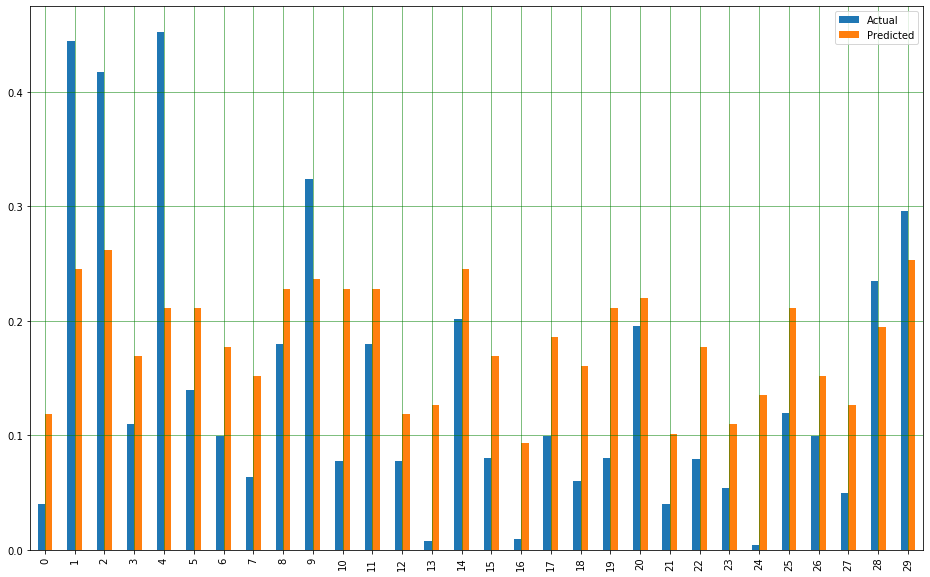

In [59]:
newPredLinRFrame = predLinR.head(30)
newPredLinRFrame.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()